# Código de imágenes de pocas hojas

Este Scrip esta diseñado para análizar los datos obtenidos a partir de las zonas donde se presentan la enfermedad en hojas de banano extraidas de la zona bananera del Magdalena. Con esto se iniciara una busqueda en diferentes imágenes de estos valores

In [25]:
import cv2
import os
import numpy as np
import matplotlib.pyplot as plt

Las imágenes se encuentran a partir de 560 hasta 875

In [10]:
img_RGB2 = cv2.imread("./data/Plan_Hojas/103MEDIA/DJI_0560.JPG",1)
img_RGB = cv2.imread("./data/Plan_Hojas/103MEDIA/DJI_0560.JPG",0)
img_GRE = cv2.imread("./data/Plan_Hojas/103MEDIA/DJI_0562.TIF",0)
img_BLU = cv2.imread("./data/Plan_Hojas/103MEDIA/DJI_0561.TIF",0)
img_NIR = cv2.imread("./data/Plan_Hojas/103MEDIA/DJI_0565.TIF",0)
img_RED = cv2.imread("./data/Plan_Hojas/103MEDIA/DJI_0563.TIF",0)
img_REG = cv2.imread("./data/Plan_Hojas/103MEDIA/DJI_0564.TIF",0)
width,height=img_RGB.shape
print(img_RGB.shape)

(1300, 1600)


In [13]:

# importamos funciones de estabilización de imágenes
def estabilizador_imagen(imagen_base, imagen_a_estabilizar, radio = 0.75, error_reproyeccion = 4.0, coincidencias = False):
        """Esta clase devuelve una secuencia de imágenes tomadas de la cámara estabilizada con respecto a la primera imagen"""
        
        # Se obtienen los puntos deinterés
        
        (kpsBase, featuresBase) = obtener_puntos_interes(imagen_base)
        (kpsAdicional, featuresAdicional) = obtener_puntos_interes(imagen_a_estabilizar)
        # Se buscan las coincidencias        
        
        M = encontrar_coincidencias(imagen_base, imagen_a_estabilizar, kpsBase, kpsAdicional, featuresBase, featuresAdicional, radio)
        
        if M is None:
            print("pocas coincidencias")
            return None
        
        if len(M) > 4:
            # construct the two sets of points
            # M2 = cv2.getPerspectiveTransform(ptsA,ptsB)
            (H, status) = encontrar_H_RANSAC_Estable(M, kpsBase, kpsAdicional, error_reproyeccion)
            estabilizada = cv2.warpPerspective(imagen_base,H,(imagen_base.shape[1],imagen_base.shape[0]))
            return estabilizada
        print("sin coincidencias")
        return None
    #--------------------------------------------------------------------------
def obtener_puntos_interes(imagen):
    f =cv2.SIFT_create()
    (kps, features) =f.detectAndCompute(imagen, None)
    return kps, features

def encontrar_coincidencias(img1, img2, kpsA, kpsB, featuresA, featuresB, ratio):
        """Metodo para estimar la homografia"""
        
        matcher = cv2.DescriptorMatcher_create("BruteForce")
        rawMatches = matcher.knnMatch(featuresA, featuresB, 2)
        matches = []
#        
#        # loop over the raw matches
        for m in rawMatches:
#            # ensure the distance is within a certain ratio of each
#            # other (i.e. Lowe's ratio test)
            if len(m) == 2 and m[0].distance < m[1].distance * ratio:
                matches.append((m[0].trainIdx, m[0].queryIdx))
        
#        print (matches)
        return matches
    
def encontrar_H_RANSAC_Estable( matches, kpsA, kpsB, reprojThresh):
        """Metodo para aplicar una H a una imagen y obtener la proyectividad"""
        
        if len(matches) > 4:
            # construct the two sets of points
            ptsA = np.float32([kpsA[i].pt for (_, i) in matches])
            ptsB = np.float32([kpsB[i].pt for (i, _) in matches])
    
            # compute the homography between the two sets of points
            (H, status) = cv2.findHomography(ptsA, ptsB, cv2.RANSAC, reprojThresh)
            
            return (H, status)

# Experimento
1) Se realizara alineación de las imágenes con respecto al RGB
2) Se extraeran datos en pequeñas matrices de la enfermedad
3) Se comrparan estos valores rpesentados en imágenes de cultivos productivos en salidas de campo normales

In [14]:
b_RGB = cv2.resize(img_RGB, (width, height), interpolation=cv2.INTER_LINEAR)
b_GRE = cv2.resize(img_GRE, (width, height), interpolation=cv2.INTER_LINEAR)
base_NIR = cv2.resize(img_NIR, (width, height), interpolation=cv2.INTER_LINEAR)
b_RED = cv2.resize(img_RED, (width, height), interpolation=cv2.INTER_LINEAR)
b_REG = cv2.resize(img_REG, (width, height), interpolation=cv2.INTER_LINEAR)
b_BLU = cv2.resize(img_BLU, (width, height), interpolation=cv2.INTER_LINEAR)
b_RGB2 = cv2.resize(img_RGB2, (width, height), interpolation=cv2.INTER_LINEAR)


stb_GRE = estabilizador_imagen(b_GRE, b_RGB)
stb_RGB = b_RGB
stb_RED = estabilizador_imagen(b_RED, b_RGB)
stb_REG = estabilizador_imagen(b_REG, b_RGB)
stb_BLU = estabilizador_imagen(b_BLU, b_RGB)
stb_NIR=estabilizador_imagen(base_NIR, b_RGB)
stb_RGB2 = estabilizador_imagen(b_RGB2, b_RGB)

# Verificación

    Proyectamos las 7 imágenes para hacer su comparativa con el siguientes orden:

    RGB(a color)  NIR  REG
    R             G     B
    
fig = plt.figure()

ax1 = fig.add_subplot(2,2,1)

ax1.imshow(...)

ax2 = fig.add_subplot(2,2,2)

ax2.imshow(...)

ax3 = fig.add_subplot(2,2,3)

ax3.imshow(...)

ax4 = fig.add_subplot(2,2,4)

ax4.imshow(...)

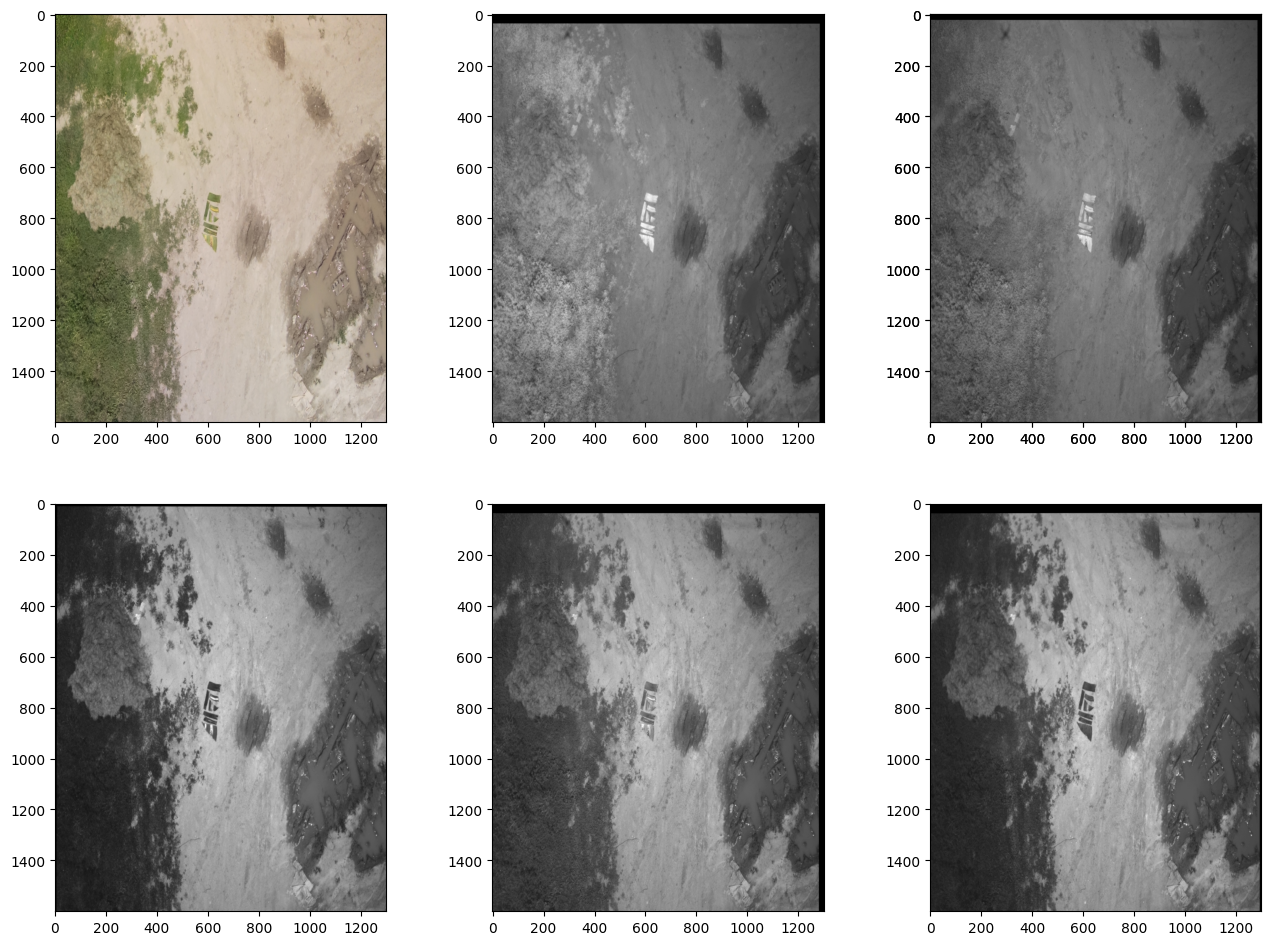

In [22]:

grafica=plt.figure(figsize=[16,18])

rgb=grafica.add_subplot(3,3,1)
rgb.imshow(cv2.cvtColor(stb_RGB2,cv2.COLOR_BGR2RGB)) # Hacemos conversión para que se vea RGB y no BGR
#Con las demas gráficas no hay problema porque estan en escala de grises  

nir=grafica.add_subplot(3,3,2)
nir.imshow(stb_NIR,cmap='gray')

reg=grafica.add_subplot(3,3,3)
reg.imshow(stb_REG,cmap='gray')

reg=grafica.add_subplot(3,3,3)
reg.imshow(stb_REG,cmap='gray')

red=grafica.add_subplot(3,3,4)
red.imshow(stb_RED,cmap='gray')

Green=grafica.add_subplot(3,3,5)
Green.imshow(stb_GRE,cmap='gray')

blue=grafica.add_subplot(3,3,6)
blue.imshow(stb_BLU,cmap='gray')



# Comprobando 
Realizamos la función Merge para obtener un RGB con la combinación de las capas R, g y b

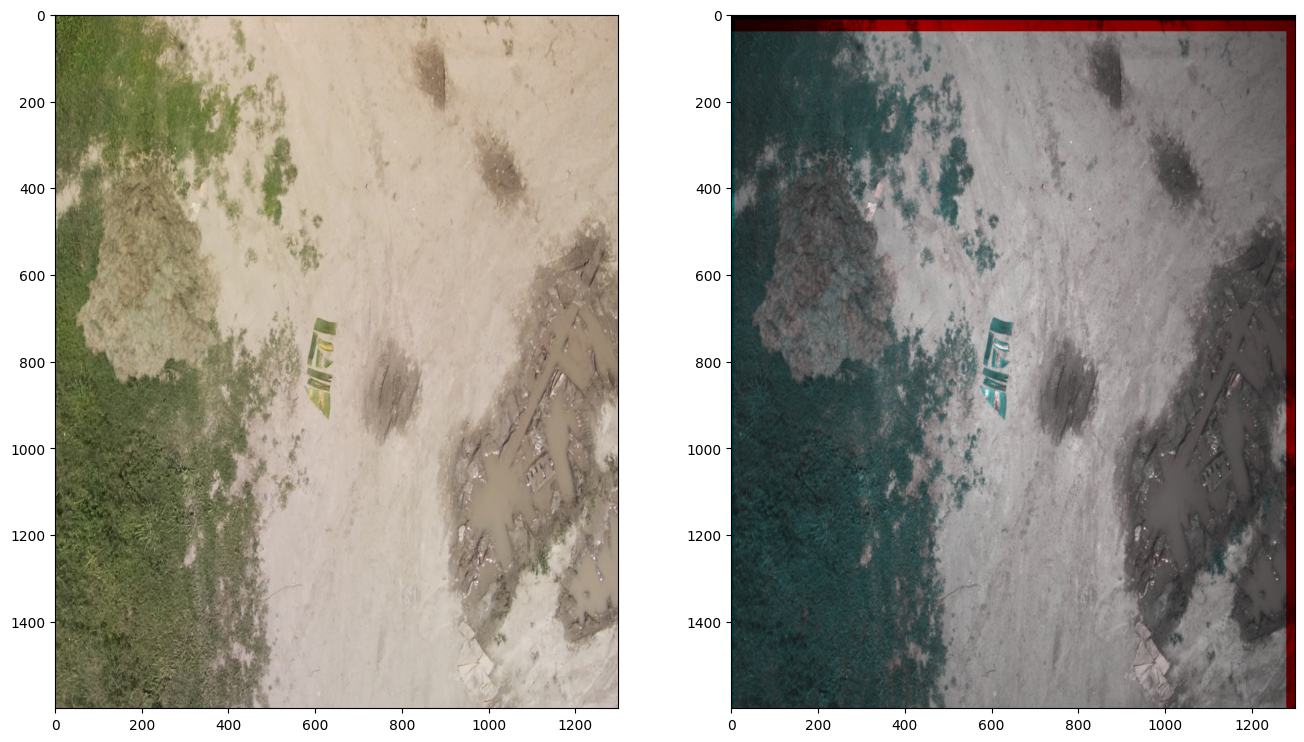

In [24]:
merged_fix_stb1 = cv2.merge((stb_RED,stb_GRE, stb_GRE))

grafica_com=plt.figure(figsize=[16,18])

rgb2=grafica_com.add_subplot(1,2,1)
rgb2.imshow(cv2.cvtColor(stb_RGB2,cv2.COLOR_BGR2RGB)) # Hacemos conversión para que se vea RGB y no BGR
#Con las demas gráficas no hay problema porque estan en escala de grises  

rgb2=grafica_com.add_subplot(1,2,2)
rgb2.imshow(merged_fix_stb1) # Hacemos conversión para que se vea RGB y no BGR
#Con las demas gráficas no hay problema porque estan en escala de grises  


Podemos notar que las bandas resaltan el daño de la enfermedad en las bandas del rojo, procedemos a utilizar imágenes de menor altura para obtener valores de la enfermedad

# Prueba 2

Se procede a obtener datos de las imágenes 860 - 620(mejor 610) - 590-580

(1300, 1600)


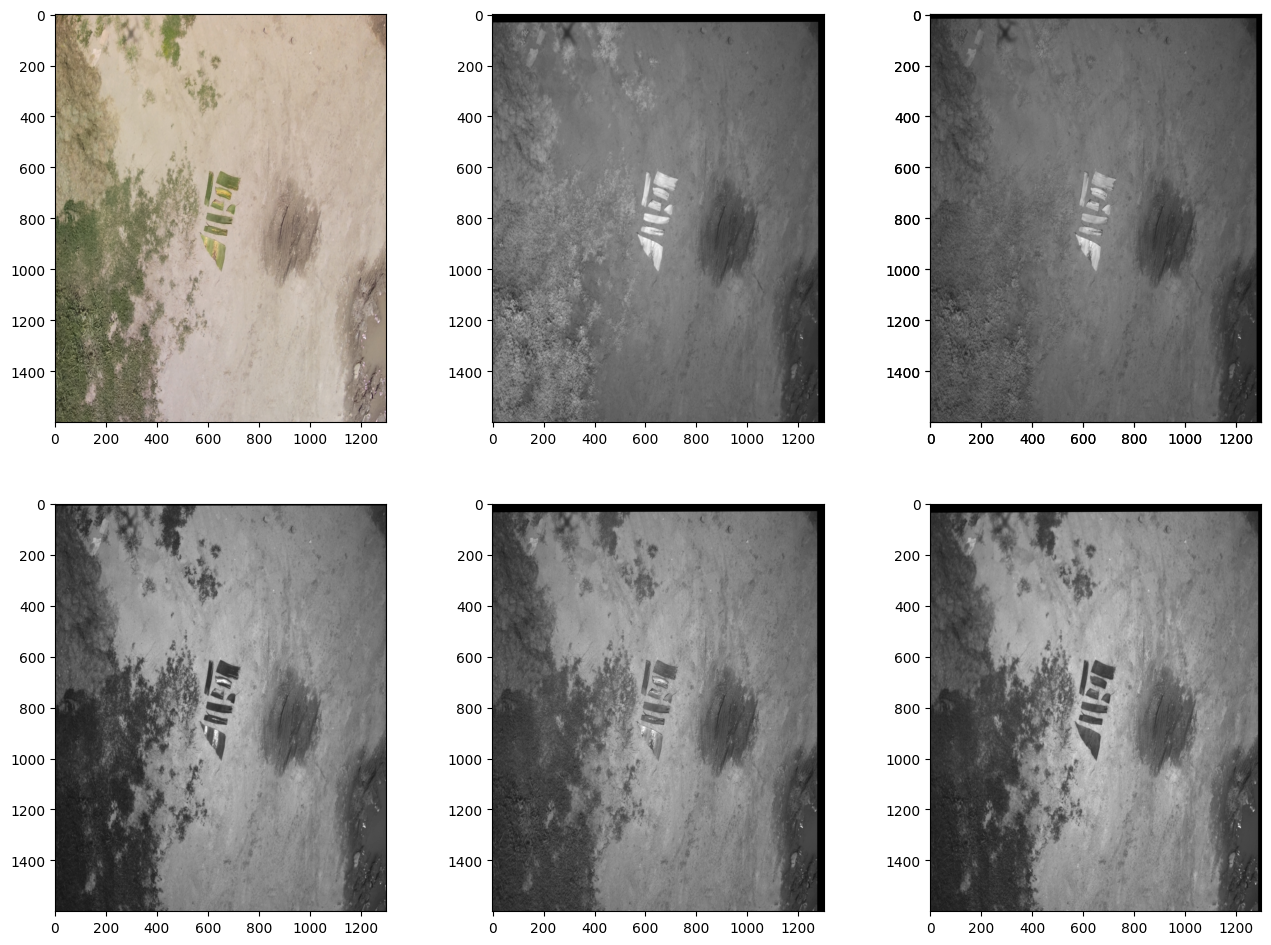

In [26]:
# Paso 1
img_RGB2 = cv2.imread("./data/Plan_Hojas/103MEDIA/DJI_0590.JPG",1)
img_RGB = cv2.imread("./data/Plan_Hojas/103MEDIA/DJI_0590.JPG",0)
img_GRE = cv2.imread("./data/Plan_Hojas/103MEDIA/DJI_0592.TIF",0)
img_BLU = cv2.imread("./data/Plan_Hojas/103MEDIA/DJI_0591.TIF",0)
img_NIR = cv2.imread("./data/Plan_Hojas/103MEDIA/DJI_0595.TIF",0)
img_RED = cv2.imread("./data/Plan_Hojas/103MEDIA/DJI_0593.TIF",0)
img_REG = cv2.imread("./data/Plan_Hojas/103MEDIA/DJI_0594.TIF",0)
width,height=img_RGB.shape
print(img_RGB.shape)

b_RGB = cv2.resize(img_RGB, (width, height), interpolation=cv2.INTER_LINEAR)
b_GRE = cv2.resize(img_GRE, (width, height), interpolation=cv2.INTER_LINEAR)
base_NIR = cv2.resize(img_NIR, (width, height), interpolation=cv2.INTER_LINEAR)
b_RED = cv2.resize(img_RED, (width, height), interpolation=cv2.INTER_LINEAR)
b_REG = cv2.resize(img_REG, (width, height), interpolation=cv2.INTER_LINEAR)
b_BLU = cv2.resize(img_BLU, (width, height), interpolation=cv2.INTER_LINEAR)
b_RGB2 = cv2.resize(img_RGB2, (width, height), interpolation=cv2.INTER_LINEAR)


stb_GRE = estabilizador_imagen(b_GRE, b_RGB)
stb_RGB = b_RGB
stb_RED = estabilizador_imagen(b_RED, b_RGB)
stb_REG = estabilizador_imagen(b_REG, b_RGB)
stb_BLU = estabilizador_imagen(b_BLU, b_RGB)
stb_NIR=estabilizador_imagen(base_NIR, b_RGB)
stb_RGB2 = estabilizador_imagen(b_RGB2, b_RGB)


grafica=plt.figure(figsize=[16,18])

rgb=grafica.add_subplot(3,3,1)
rgb.imshow(cv2.cvtColor(stb_RGB2,cv2.COLOR_BGR2RGB)) # Hacemos conversión para que se vea RGB y no BGR
#Con las demas gráficas no hay problema porque estan en escala de grises  

nir=grafica.add_subplot(3,3,2)
nir.imshow(stb_NIR,cmap='gray')

reg=grafica.add_subplot(3,3,3)
reg.imshow(stb_REG,cmap='gray')

reg=grafica.add_subplot(3,3,3)
reg.imshow(stb_REG,cmap='gray')

red=grafica.add_subplot(3,3,4)
red.imshow(stb_RED,cmap='gray')

Green=grafica.add_subplot(3,3,5)
Green.imshow(stb_GRE,cmap='gray')

blue=grafica.add_subplot(3,3,6)
blue.imshow(stb_BLU,cmap='gray')

# paso 2 Procedimiento

en este caso procedemos a extraer datos de las zonas afectadas en las hojas en matrices  y tratar de graficarlas para obtener los datos

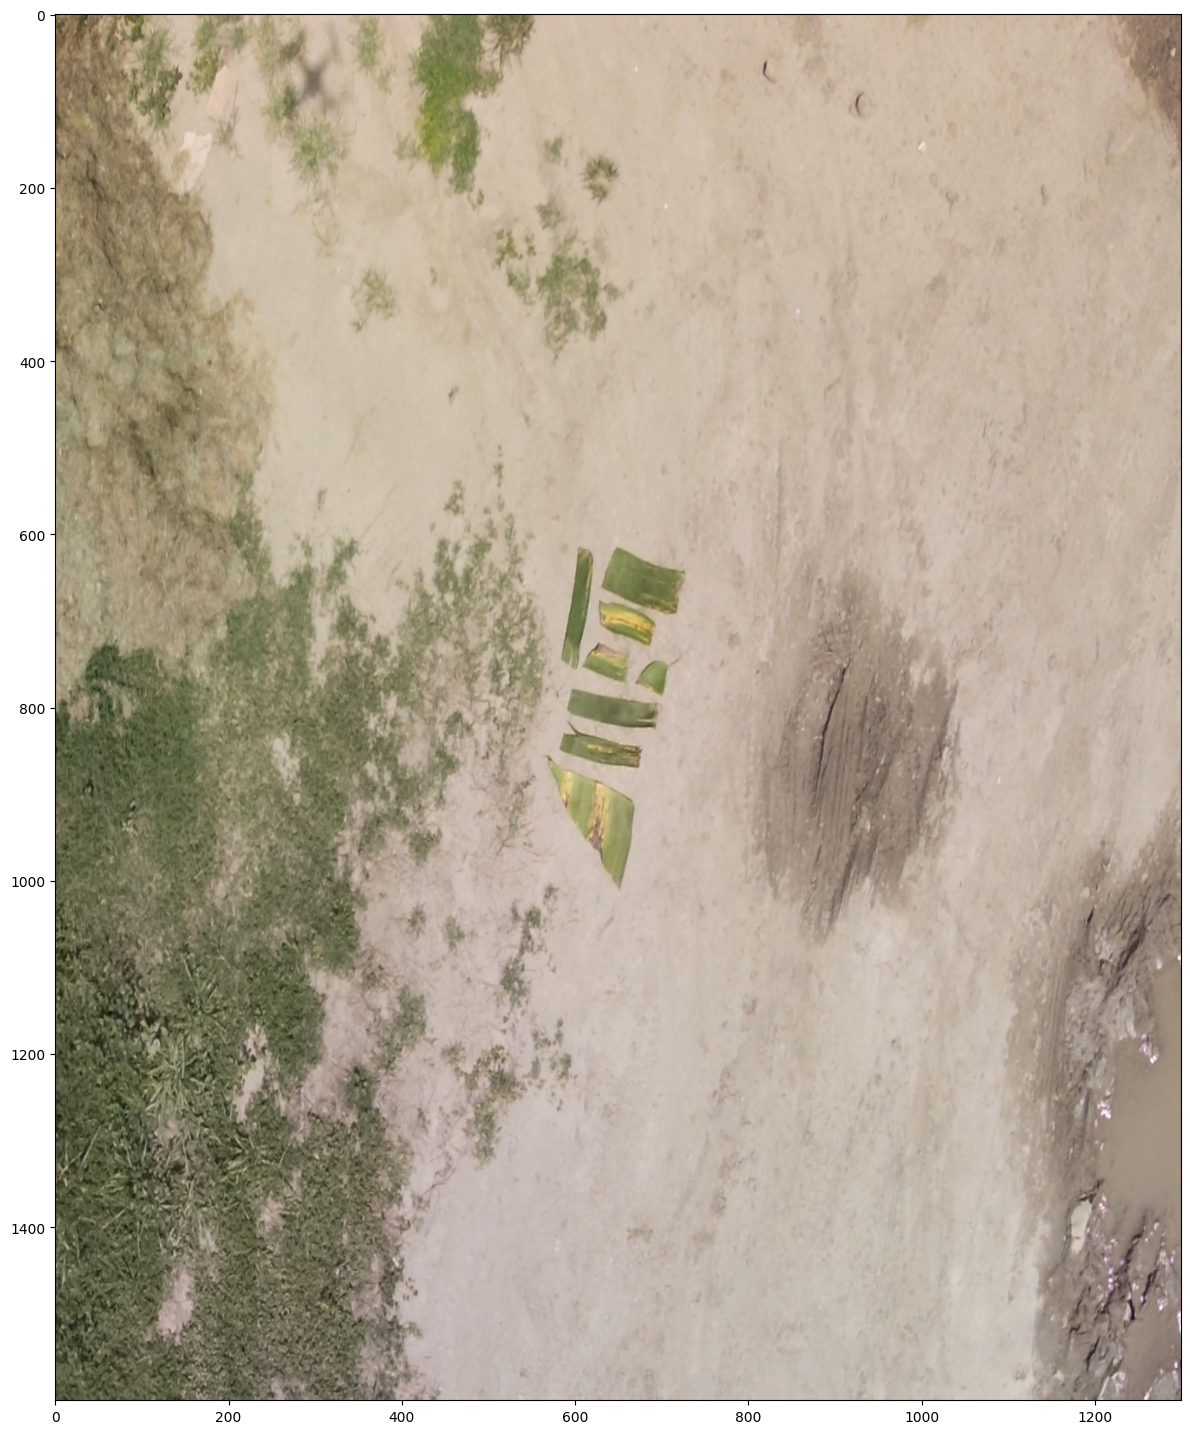

In [30]:
#realziamos copia de la imágen original, (la voy a ahcer y luego al conversión del campo de color)



plt.figure(figsize=[16,18])

plt.imshow(cv2.cvtColor(stb_RGB2,cv2.COLOR_BGR2RGB)) # Hacemos conversión para que se vea RGB y no BGR
#Con las demas gráficas no hay problema porque estan en escala de grises  
#plt.show()

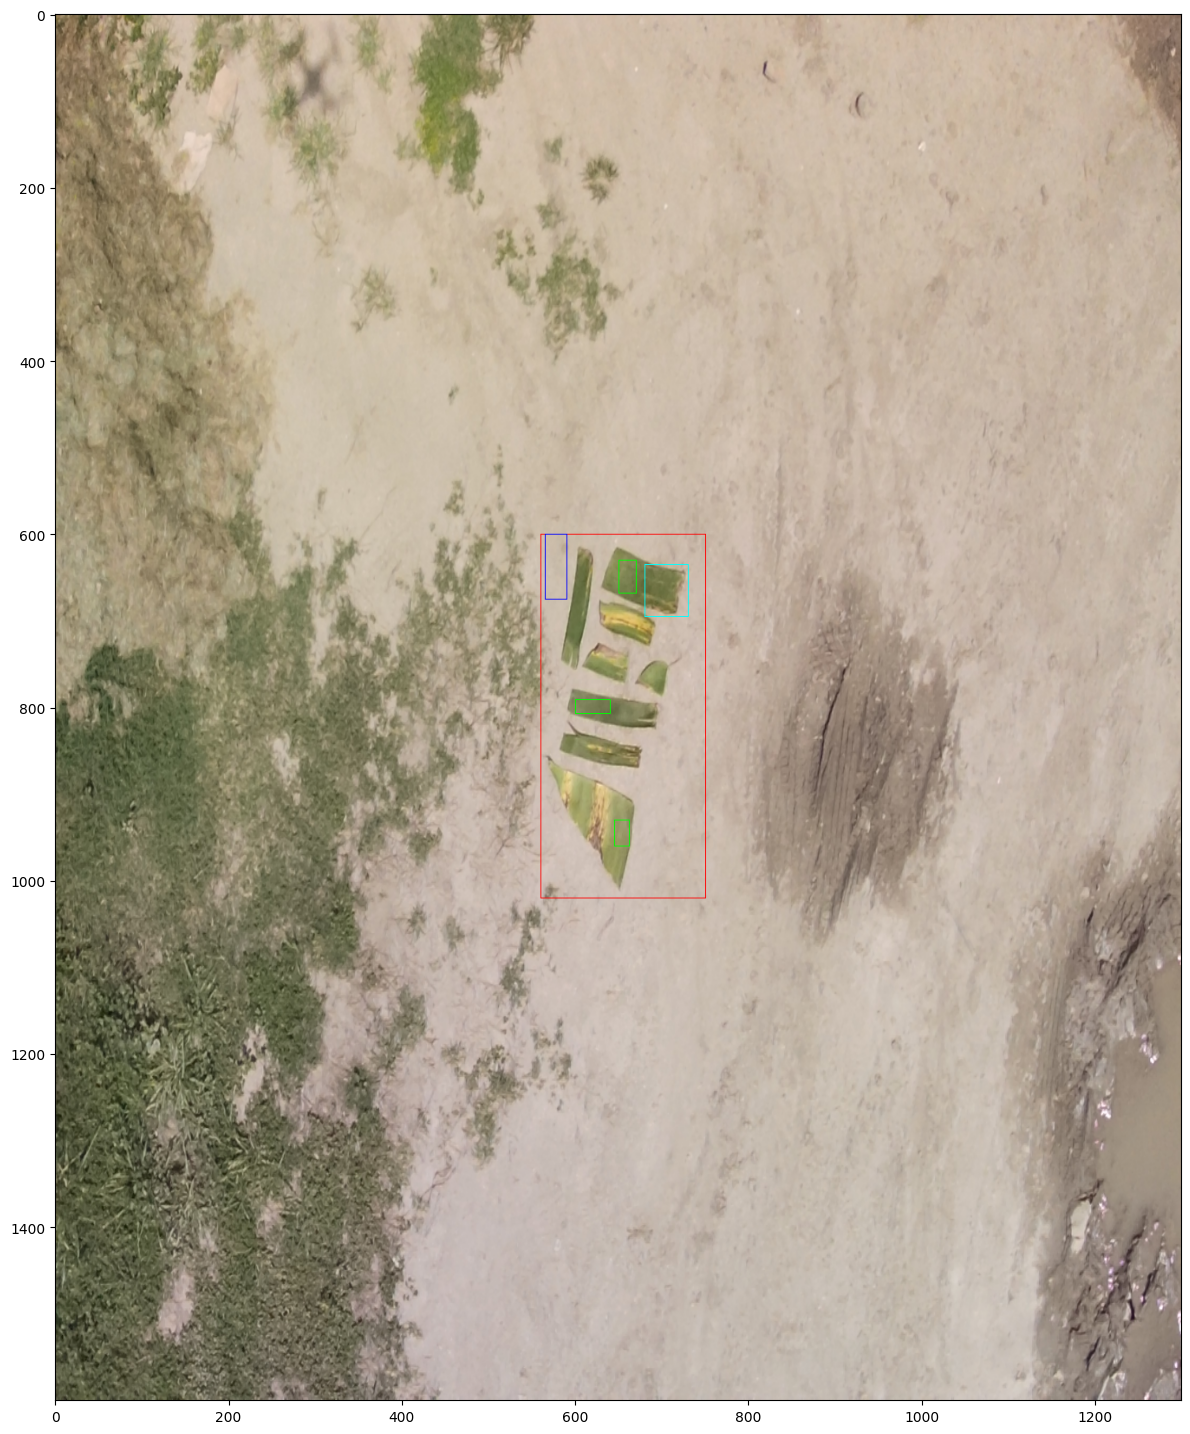

In [117]:
# Realizamos una copia

copia_rgb=stb_RGB2.copy()
copiargb=cv2.cvtColor(copia_rgb,cv2.COLOR_BGR2RGB)
rgb_normal=copiargb.copy()
#Muestra general
copia_rec=cv2.rectangle(copiargb,(560,600),(750,1020),(255,0,0),thickness=1)
# muestra arena
copia_rec=cv2.rectangle(copia_rec,(565,600),(590,675),(0,0,255),thickness=1)
# muestra hoja sana
copia_rec=cv2.rectangle(copia_rec,(650,630),(670,668),(0,255,0),thickness=1) 
copia_rec=cv2.rectangle(copia_rec,(600,791),(640,807),(0,255,0),thickness=1) 
copia_rec=cv2.rectangle(copia_rec,(645,930),(662,960),(0,255,0),thickness=1) 
# muestra general
copia_rec=cv2.rectangle(copia_rec,(680,635),(730,695),(0,255,255),thickness=1) 

coord=[[(560,600),(590,675)],[(650,630),(670,668)],[(600,791),(640,807)],[(645,930),(662,960)]]

plt.figure(figsize=[16,18])
plt.imshow(copia_rec)



In [145]:
def matrices(imagen,cordenadas,extra):
    cordenadas.append(extra)
    matrices=[]
    for cords in cordenadas: 
        matrices.append(imagen[cords[0][1]:(cords[1][1]+1),cords[0][0]:(cords[1][0]+1)])
        #print(f"{cords[0][0]}  --  {cords[1][0]}")
    return matrices


def unir_matrices(matrices):
    # Obtener el número de filas y columnas de cada matriz
    filas = []
    columnas = []
    for matriz in matrices:
        filas.append(matriz.shape[0])
        columnas.append(matriz.shape[1])
    
    # Calcular el número total de filas y columnas de la matriz resultante
    total_filas = sum(filas)
    total_columnas = sum(columnas)
    
    # Crear la matriz vacía
    matriz_unida = np.zeros((total_filas, total_columnas))
    
    # Llenar la matriz con los valores de las matrices originales
    fila_actual = 0
    columna_actual = 0
    for matriz in matrices:
        fila_final = fila_actual + matriz.shape[0]
        columna_final = columna_actual + matriz.shape[1]
        matriz_unida[fila_actual:fila_final, columna_actual:columna_final] = matriz
        fila_actual = fila_final
        columna_actual = columna_final
        
    return matriz_unida

ValueError: x and y can be no greater than 2D, but have shapes (17,) and (17, 41, 3)

<Figure size 640x480 with 0 Axes>

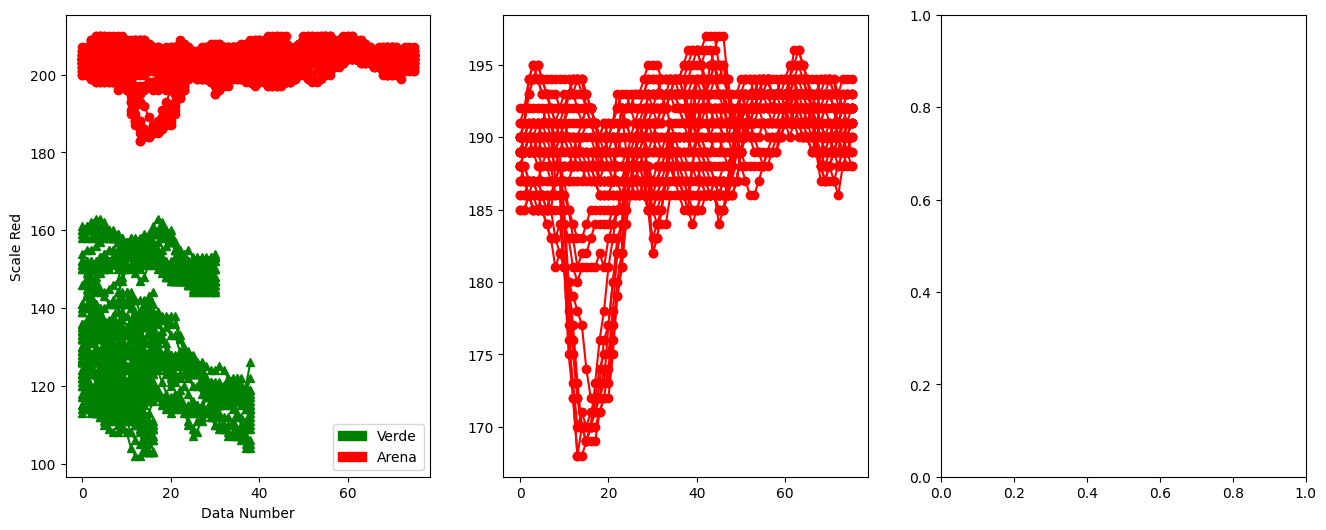

In [149]:

resultado=matrices(rgb_normal,coord,[(680,635),(730,695)])


import matplotlib.patches as mpatches

fig = plt.figure()

# Agrrgamos un plano 3D
#ax1 = fig.add_subplot(111,projection='3d')

# Datos en array bi-dimensional

''' # plot_wireframe nos permite agregar los datos x, y, z. Por ello 3D
# Es necesario que los datos esten contenidos en un array bi-dimensional
ax1.scatter(x, y, z,c ='r', marker='o',label="hola")
ax1.scatter(x2, y2, z2,c ='g', marker='^')

ax1.set_xlabel('BLUE')
ax1.set_ylabel('GREEN')
ax1.set_zlabel('RED')
ax1.set_autoscale_on(1)
# Mostramos el gráfico
plt.show() '''

aren=resultado[0]
x1=aren[:,:,0]
x2=aren[:,:,1]
x3=aren[:,:,2]

h=resultado[1]
h1=h[:,:,0]
h2=h[:,:,1]
h3=h[:,:,2]

h2l=resultado[2]
h21=h2l[:,:,0]
h22=h2l[:,:,1]
h23=h2l[:,:,2]

h3l=resultado[3]
h31=h3l[:,:,0]
h32=h3l[:,:,1]
h33=h3l[:,:,2]

fig = plt.figure(figsize=[16, 6])
ax=fig.add_subplot(1,3,1)
ax2=fig.add_subplot(1,3,2)
ax3=fig.add_subplot(1,3,3)



ax.plot(x1,c ='r', marker='o', label="Arena")
ax.plot(h1,c ='g', marker='^',label="Verde")
ax.plot(h21,c ='g', marker='^',label="Verde")
ax.plot(h31,c ='g', marker='^',label="Verde")

red_patch = mpatches.Patch(color='red', label='Arena')
green_patch = mpatches.Patch(color='green', label='Verde')

ax.legend(handles=[green_patch,red_patch])
ax.set_xlabel("Data Number")
ax.set_ylabel("Scale Red")

ax2.plot(x2,c ='r', marker='o', label="Arena")
ax2.plot(h2,c ='g', marker='^',label="Verde")
ax2.plot(h22,c ='g', marker='^',label="Verde")
ax2.plot(h32,c ='g', marker='^',label="Verde")

red_patch = mpatches.Patch(color='red', label='Arena')
green_patch = mpatches.Patch(color='green', label='Verde')

ax2.legend(handles=[green_patch,red_patch])
ax2.set_xlabel("Data Number")
ax2.set_ylabel("Scale Green")

ax3.plot(x3,c ='r', marker='o', label="Arena")
ax3.plot(h3,c ='g', marker='^',label="Verde")
ax3.plot(h23,c ='g', marker='^',label="Verde")
ax3.plot(h33,c ='g', marker='^',label="Verde")
red_patch = mpatches.Patch(color='red', label='Arena')
green_patch = mpatches.Patch(color='green', label='Verde')

ax3.legend(handles=[green_patch,red_patch])
ax3.set_xlabel("Data Number")
ax3.set_ylabel("Scale Green")
#ax1.scatter(x2, y2,c ='g', marker='^')
#ax.legend(numpoints= 1)
#plt.set_xlabel('BLUE')
#plt.set_ylabel('GREEN')
#ax1.set_zlabel('RED')
#ax1.set_autoscale_on(1)
# Mostramos el gráfico

plt.show()


In [128]:
pru=resultado[0]
pru.shape

(76, 31, 3)

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.patches as mpatches

fig = plt.figure()

# Agrrgamos un plano 3D
#ax1 = fig.add_subplot(111,projection='3d')

# Datos en array bi-dimensional
x = valores2[:,:,0]
y = valores2[:,:,1]
z = valores2[:,:,2]

x2 = valores2_b[:,:,0]
y2 = valores2_b[:,:,1]
z2 = valores2_b[:,:,2]

''' # plot_wireframe nos permite agregar los datos x, y, z. Por ello 3D
# Es necesario que los datos esten contenidos en un array bi-dimensional
ax1.scatter(x, y, z,c ='r', marker='o',label="hola")
ax1.scatter(x2, y2, z2,c ='g', marker='^')

ax1.set_xlabel('BLUE')
ax1.set_ylabel('GREEN')
ax1.set_zlabel('RED')
ax1.set_autoscale_on(1)
# Mostramos el gráfico
plt.show() '''


""" grafica=plt.figure(figsize=[16,18])

rgb=grafica.add_subplot(3,3,1)
rgb.imshow(cv2.cvtColor(stb_RGB2,cv2.COLOR_BGR2RGB)) # Hacemos conversión para que se vea RGB y no BGR
#Con las demas gráficas no hay problema porque estan en escala de grises  

nir=grafica.add_subplot(3,3,2)
nir.imshow(stb_NIR,cmap='gray')

reg=grafica.add_subplot(3,3,3)
reg.imshow(stb_REG,cmap='gray')

reg=grafica.add_subplot(3,3,3)
reg.imshow(stb_REG,cmap='gray')

red=grafica.add_subplot(3,3,4)
red.imshow(stb_RED,cmap='gray')

Green=grafica.add_subplot(3,3,5)
Green.imshow(stb_GRE,cmap='gray')

blue=grafica.add_subplot(3,3,6)
blue.imshow(stb_BLU,cmap='gray') """


fig, ax,ax2,ax3=plt.subplots()

ax.plot(x,c ='r', marker='o', label="noise")
ax.plot(x2,c ='g', marker='^',label="canopy")
red_patch = mpatches.Patch(color='red', label='noise')
green_patch = mpatches.Patch(color='green', label='canopy')

ax.legend(handles=[green_patch,red_patch])
ax.set_xlabel("Data Number")
ax.set_ylabel("Scale Red")


ax2.plot(x,c ='r', marker='o', label="noise")
ax2.plot(x2,c ='g', marker='^',label="canopy")
red_patch = mpatches.Patch(color='red', label='noise')
green_patch = mpatches.Patch(color='green', label='canopy')

ax.legend(handles=[green_patch,red_patch])
ax.set_xlabel("Data Number")
ax.set_ylabel("Scale Red")
#ax1.scatter(x2, y2,c ='g', marker='^')
#ax.legend(numpoints= 1)
#plt.set_xlabel('BLUE')
#plt.set_ylabel('GREEN')
#ax1.set_zlabel('RED')
#ax1.set_autoscale_on(1)
# Mostramos el gráfico
plt.show()
